In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math
from scipy.spatial.transform import Rotation as R
import numpy.linalg as linalg
from pprint import pp

In [67]:
def draw_poly(corner, basis1, basis2, color, names=["u","x"]):
    ax= plt.gca()
    plt.quiver( 0, 0, *np.squeeze(corner), color=color, angles='xy', scale_units='xy', scale=1, width=0.005, headwidth=5)
    plt.quiver( 0, 0, *np.squeeze(basis1), color=color, angles='xy', scale_units='xy', scale=1, width=0.003, headwidth=1,alpha=0.5)
    plt.quiver( 0, 0, *np.squeeze(basis2), color=color, angles='xy', scale_units='xy', scale=1, width=0.003, headwidth=1,alpha=0.5)
    v_poly = patches.Polygon( np.array([ origin, np.squeeze(basis1), np.squeeze(corner), np.squeeze(basis2)]) , facecolor=color, alpha=0.2)
    ax.add_patch(v_poly)
    
    plt.text(basis1[0,0],basis1[1,0], f"{names[0]}1",fontsize=8,color=color)
    plt.text(basis2[0,0],basis2[1,0], f"{names[0]}2",fontsize=8,color=color)
    plt.text(corner[0,0],corner[1,0], f"{names[1]}",fontsize=8,color=color)

def diff_angles(vec1, vec2):
    if len(vec1.shape) == 1:
        vec1 = np.reshape(vec1, (-1,1))
    if len(vec2.shape) == 1:
        vec2 = np.reshape(vec2, (-1,1))
    rad1 = math.atan2(vec1[0,0], vec1[1,0])
    rad2 = math.atan2(vec2[0,0], vec2[1,0])
    degs= math.degrees(rad1-rad2)
    if degs<0:
        degs = degs+360
        
    return degs

In [75]:
origin = np.array([0,0])

xaxis = np.array([1,0,0])
yaxis = np.array([0,1,0])
zaxis = np.array([0,0,1])

x = np.array([[3,2]]).T
M = np.array([[2,1],[3,-1]])
Mx = M@x

# xaxis(x)
# yaxis(x)
u1 = np.array([[x[0,0],0]]).T
u2 = np.array([[0, x[1,0]]]).T

v1 = M@u1
v2 = M@u2

angle_x = math.atan2(x[0,0], x[1,0])
angle_Mx = math.atan2(Mx[0,0], Mx[1,0])

angle_rad = angle_Mx - angle_x
# angle_deg = math.degrees( angle_delta)

RMat = R.from_rotvec(angle_rad*np.array([0,0,1])).as_matrix()[:2,:2]

rx = RMat@x
rx1 = rx[0,0]
rx2 = rx[1,0]

# compute SVD (and convert list to matrix)
U,S_array,Vh = np.linalg.svd(M)
S = np.eye(2) * S_array
V = Vh.conj()

# M_noscale = U @ np.eye(2) @ Vh

# w_x = U@Vh@x
# w1  = U@Vh@u1
# w2  = U@Vh@u2
w_x = U.T@U@x
w1  = U.T@U@u1
w2  = U.T@U@u2

pp(w1)
pp(w2)

# compute eignevalue and eigenvectors of M
evals, evecs = linalg.eig(M)

eval1 = evals[0]
eval2 = evals[1]
evec1 = evecs[:,0]
evec2 = evecs[:,1]

print("DIFF w1 w2", diff_angles(w1, w2))
print("DIFF eigen_vecs:", diff_angles(evec1, evec2))

array([[ 3.00000000e+00],
       [-3.55161966e-16]])
array([[-2.36774644e-16],
       [ 2.00000000e+00]])
DIFF w1 w2 90.00000000000003
DIFF eigen_vecs: 66.42182152179817


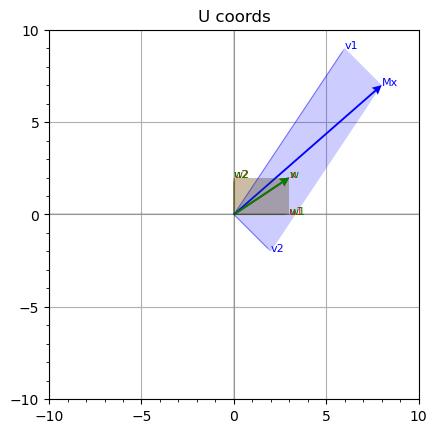

In [76]:
# plt.scatter(*x, s=10)
# plt.scatter(0,0, s=10, c='k')
ax = plt.gca()
ax.set_aspect('equal')
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_title("U coords")

ax.set_yticks(np.arange(-10,11,5))
ax.set_xticks(np.arange(-10,11,5))
ax.minorticks_on()
ax.set_axisbelow(True)

plt.axhline(0, color='black', linewidth=.2)
plt.axvline(0, color='black', linewidth=.2)

ax.grid(visible=True)

draw_poly(x, u1, u2, 'r', names=["u","x"])
draw_poly(Mx, v1, v2, 'b', names=['v','Mx'])
draw_poly(w_x, w1, w2, 'g', names=['w','w'])




array([[ 1.00000000e+00, -1.18387322e-16],
       [-1.18387322e-16,  1.00000000e+00]])